In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

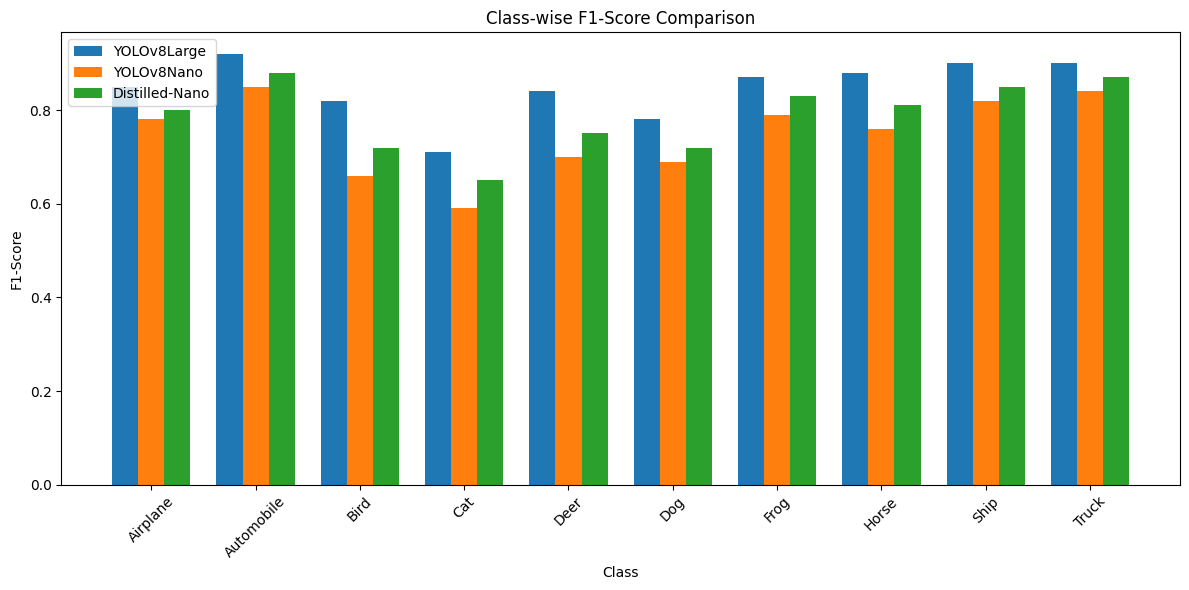

In [ ]:
# Data
classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
metrics_large = [0.85, 0.92, 0.82, 0.71, 0.84, 0.78, 0.87, 0.88, 0.90, 0.90]  # F1-scores for YOLOv8Large
metrics_nano = [0.78, 0.85, 0.66, 0.59, 0.70, 0.69, 0.79, 0.76, 0.82, 0.84]   # F1-scores for YOLOv8Nano
metrics_distilled = [0.80, 0.88, 0.72, 0.65, 0.75, 0.72, 0.83, 0.81, 0.85, 0.87]  # F1-scores for Distilled-Nano

x = np.arange(len(classes))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width, metrics_large, width, label='YOLOv8Large')
ax.bar(x, metrics_nano, width, label='YOLOv8Nano')
ax.bar(x + width, metrics_distilled, width, label='Distilled-Nano')

# Add labels, title, and legend
ax.set_xlabel('Class')
ax.set_ylabel('F1-Score')
ax.set_title('Class-wise F1-Score Comparison')
ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=45)
ax.legend()

plt.tight_layout()
plt.savefig('f1_score_comparison.pdf')
plt.show()


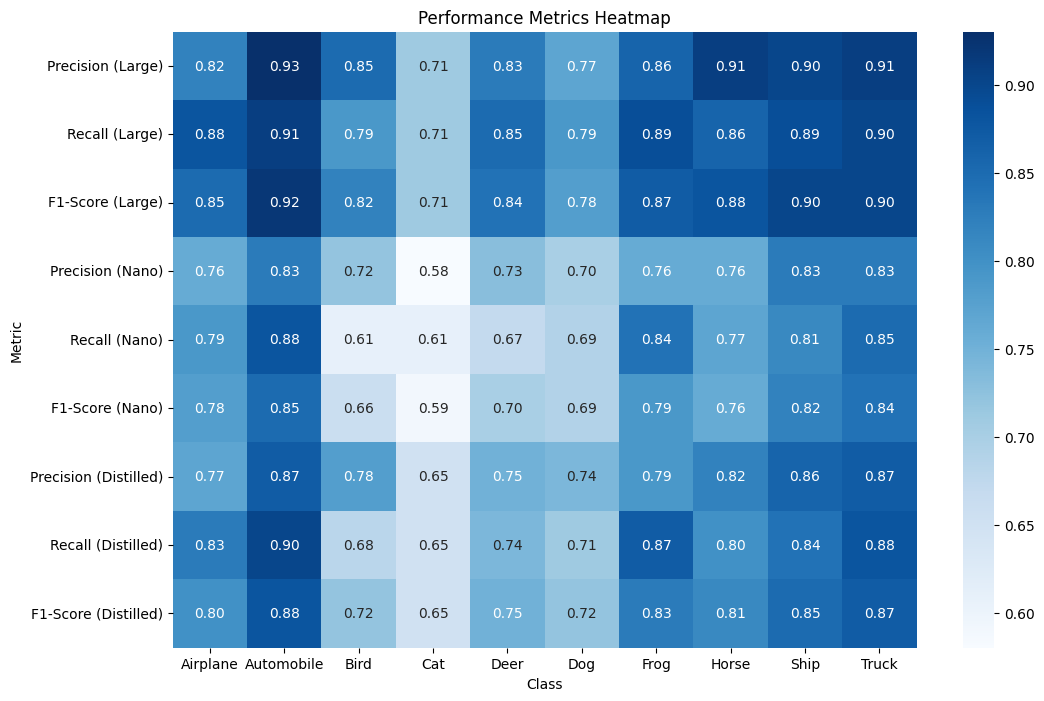

In [4]:


# Data
data = {
    'Class': classes,
    'Precision (Large)': [0.82, 0.93, 0.85, 0.71, 0.83, 0.77, 0.86, 0.91, 0.90, 0.91],
    'Recall (Large)': [0.88, 0.91, 0.79, 0.71, 0.85, 0.79, 0.89, 0.86, 0.89, 0.90],
    'F1-Score (Large)': metrics_large,
    'Precision (Nano)': [0.76, 0.83, 0.72, 0.58, 0.73, 0.70, 0.76, 0.76, 0.83, 0.83],
    'Recall (Nano)': [0.79, 0.88, 0.61, 0.61, 0.67, 0.69, 0.84, 0.77, 0.81, 0.85],
    'F1-Score (Nano)': metrics_nano,
    'Precision (Distilled)': [0.77, 0.87, 0.78, 0.65, 0.75, 0.74, 0.79, 0.82, 0.86, 0.87],
    'Recall (Distilled)': [0.83, 0.90, 0.68, 0.65, 0.74, 0.71, 0.87, 0.80, 0.84, 0.88],
    'F1-Score (Distilled)': metrics_distilled,
}

df = pd.DataFrame(data)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.set_index('Class').T, annot=True, fmt=".2f", cmap='Blues', cbar=True)
plt.title('Performance Metrics Heatmap')
plt.ylabel('Metric')
plt.savefig('metrics_heatmap.pdf')
plt.show()


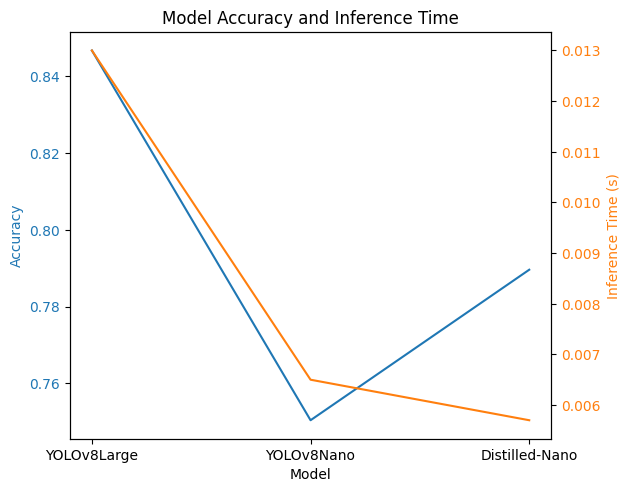

In [5]:
models = ['YOLOv8Large', 'YOLOv8Nano', 'Distilled-Nano']
accuracy = [0.8467, 0.7504, 0.7896]
inference_time = [0.0130, 0.0065, 0.0057]

fig, ax1 = plt.subplots()

# Accuracy
ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy', color='tab:blue')
ax1.plot(models, accuracy, color='tab:blue', label='Test Accuracy')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Inference Time (Secondary Axis)
ax2 = ax1.twinx()
ax2.set_ylabel('Inference Time (s)', color='tab:orange')
ax2.plot(models, inference_time, color='tab:orange', label='Inference Time')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.tight_layout()
plt.title('Model Accuracy and Inference Time')
plt.show()


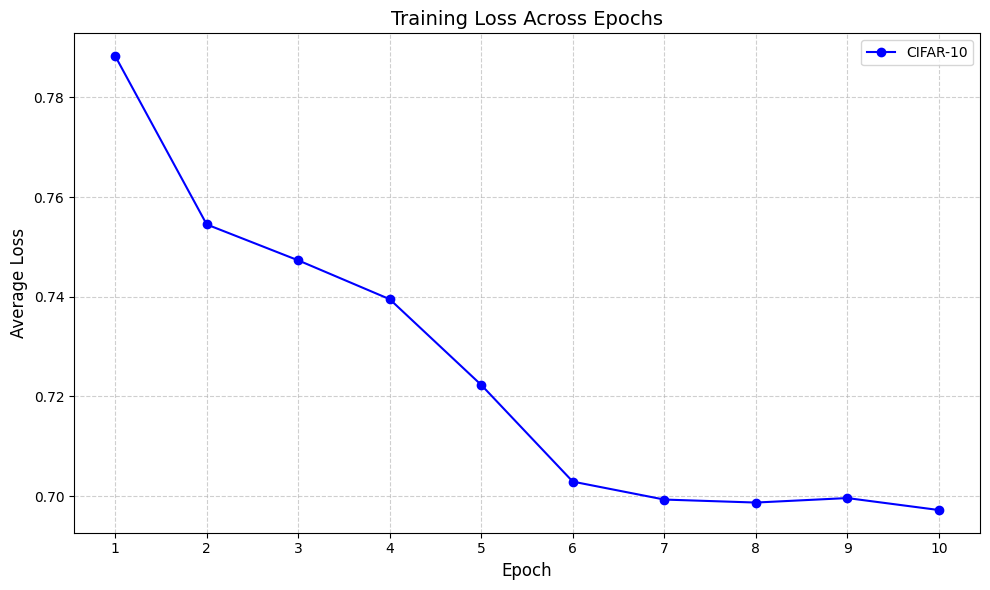

In [9]:
import matplotlib.pyplot as plt

# Data extracted from the logs
epochs = list(range(1, 11))
average_losses = [0.7883, 0.7545, 0.7473, 0.7395, 0.7223, 0.7029, 0.6993, 0.6987, 0.6996, 0.6972]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(epochs, average_losses, marker='o', color='b', label="CIFAR-10")

# Formatting the plot
plt.title("Training Loss Across Epochs", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Average Loss", fontsize=12)
plt.xticks(epochs)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Save and display the plot
plt.savefig("epoch_loss_plot.pdf")  # Save the plot as a PDF
plt.show()


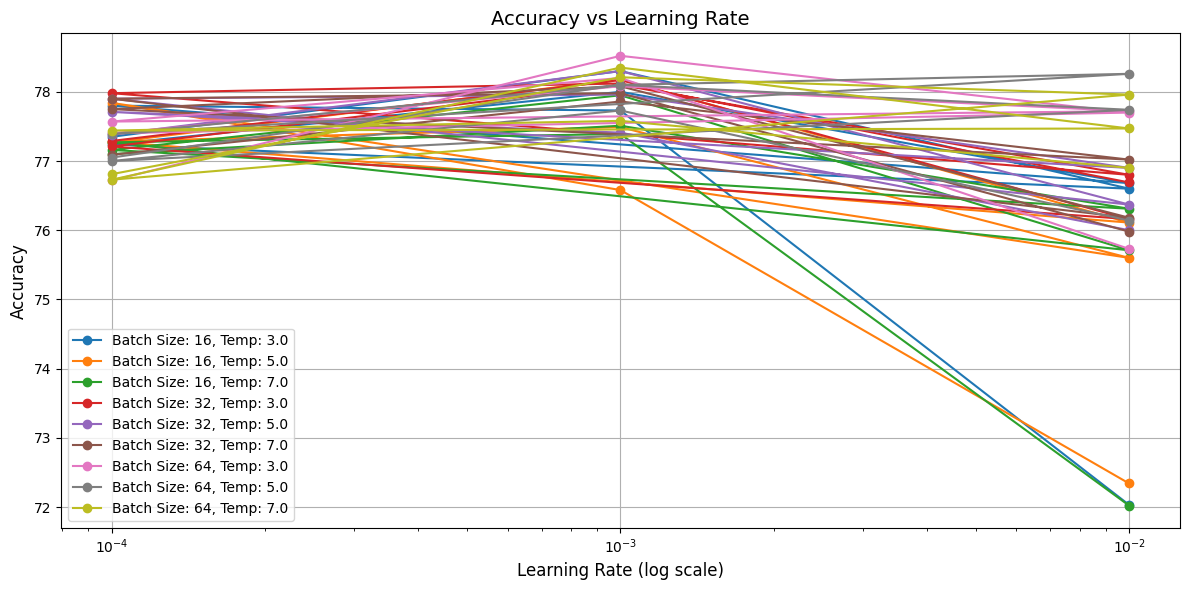

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import json


with open('/Users/aravadikesh/Documents/GitHub/yoloKD-1/grid_search_results_20241128_135154.json', 'r') as file:
    data = json.load(file)

# Convert the data to a DataFrame for easier manipulation
df = pd.DataFrame([
    {
        "alpha": item["params"]["alpha"],
        "batch_size": item["params"]["batch_size"],
        "initial_temperature": item["params"]["initial_temperature"],
        "learning_rate": item["params"]["learning_rate"],
        "accuracy": item["accuracy"]
    }
    for item in data
])

# Plot the accuracy based on learning_rate grouped by batch_size
plt.figure(figsize=(12, 6))

for batch_size in sorted(df["batch_size"].unique()):
    subset = df[df["batch_size"] == batch_size]
    for temp in sorted(subset["initial_temperature"].unique()):
        temp_subset = subset[subset["initial_temperature"] == temp]
        plt.plot(temp_subset["learning_rate"], temp_subset["accuracy"], marker='o', label=f'Batch Size: {batch_size}, Temp: {temp}')

plt.xscale('log')  # Set x-axis to logarithmic scale for learning rates
plt.xlabel('Learning Rate (log scale)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy vs Learning Rate', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


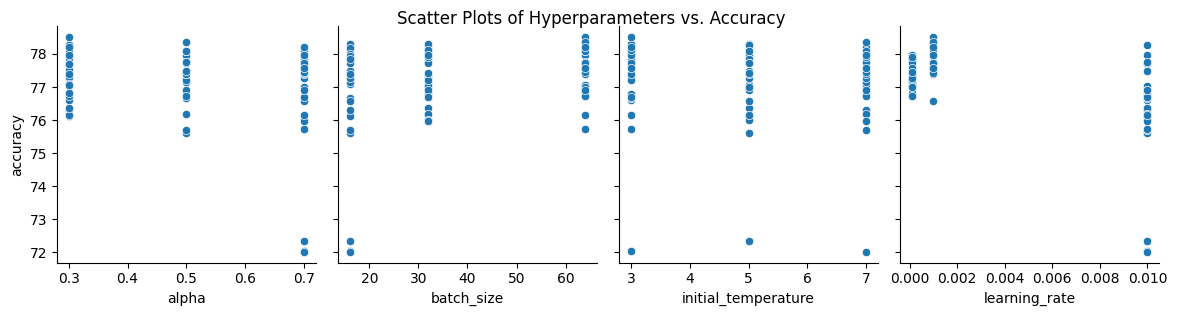

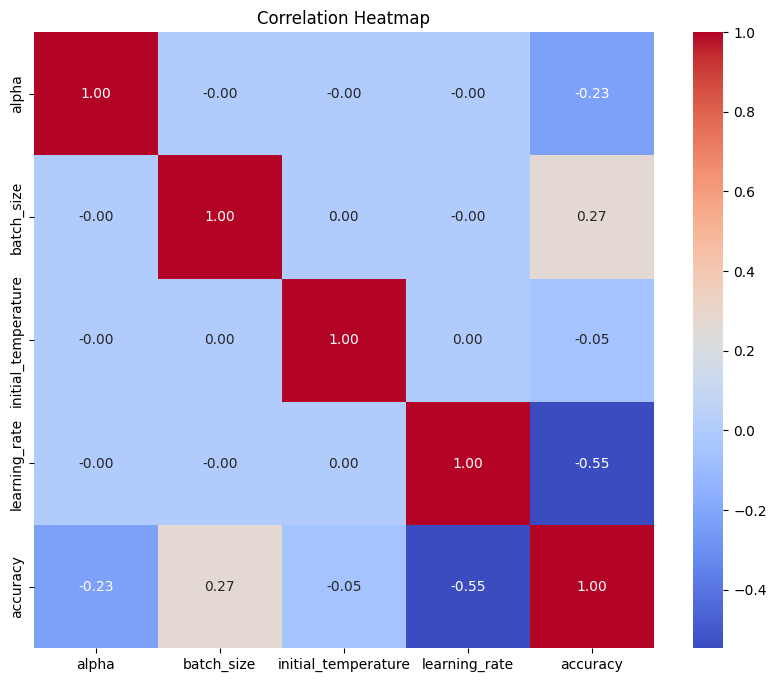

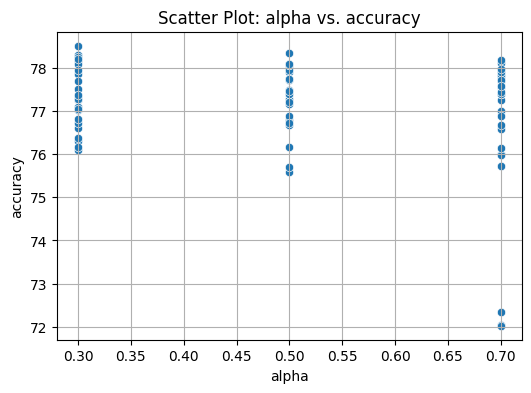

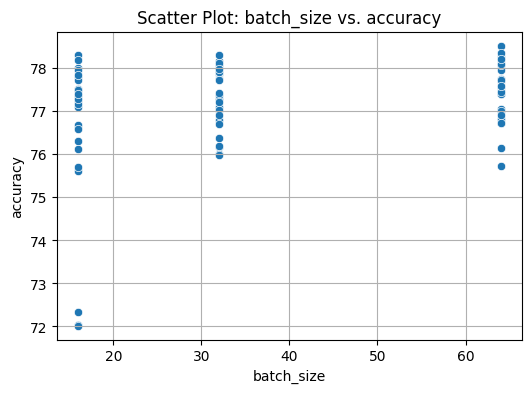

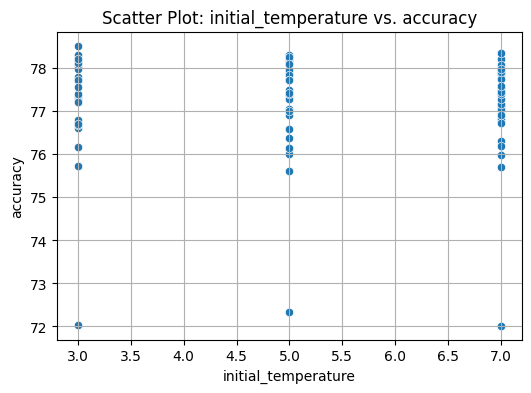

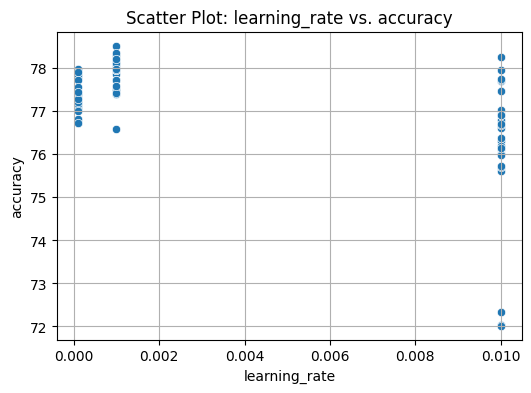

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Define the target variable and hyperparameters
target = "accuracy"  # Replace with the actual column name for accuracy in your dataset
hyperparameters = [col for col in df.columns if col != target]  # Exclude target variable

# Pairplot to visualize correlations between hyperparameters and accuracy
sns.pairplot(df, x_vars=hyperparameters, y_vars=[target], kind="scatter", height=3)
plt.suptitle("Scatter Plots of Hyperparameters vs. Accuracy", y=1.02)
plt.show()

# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Additional: Scatterplots for individual hyperparameters
for hyper in hyperparameters:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=hyper, y=target)
    plt.title(f"Scatter Plot: {hyper} vs. {target}")
    plt.xlabel(hyper)
    plt.ylabel(target)
    plt.grid(True)
    plt.show()


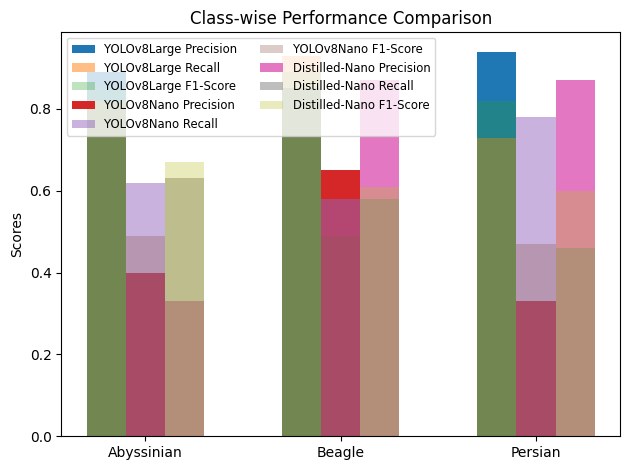

In [13]:
classes = ['Abyssinian', 'Beagle', 'Persian']
precision = [
    [0.89, 0.40, 0.33],  # YOLOv8Large, YOLOv8Nano, Distilled-Nano
    [0.85, 0.65, 0.87],
    [0.94, 0.33, 0.87]
]
recall = [
    [0.82, 0.62, 0.63],
    [0.93, 0.58, 0.58],
    [0.73, 0.78, 0.46]
]
f1 = [
    [0.85, 0.49, 0.67],
    [0.89, 0.49, 0.61],
    [0.82, 0.47, 0.60]
]

x = np.arange(len(classes))
bar_width = 0.2

fig, ax = plt.subplots()
for i, model in enumerate(models):
    ax.bar(x + i * bar_width, [precision[j][i] for j in range(len(classes))], bar_width, label=f'{model} Precision')
    ax.bar(x + i * bar_width, [recall[j][i] for j in range(len(classes))], bar_width, label=f'{model} Recall', alpha=0.5)
    ax.bar(x + i * bar_width, [f1[j][i] for j in range(len(classes))], bar_width, label=f'{model} F1-Score', alpha=0.3)

ax.set_xticks(x + bar_width)
ax.set_xticklabels(classes)
ax.set_ylabel('Scores')
ax.set_title('Class-wise Performance Comparison')
ax.legend(loc='upper left', fontsize='small', ncol=2)
plt.tight_layout()
plt.show()


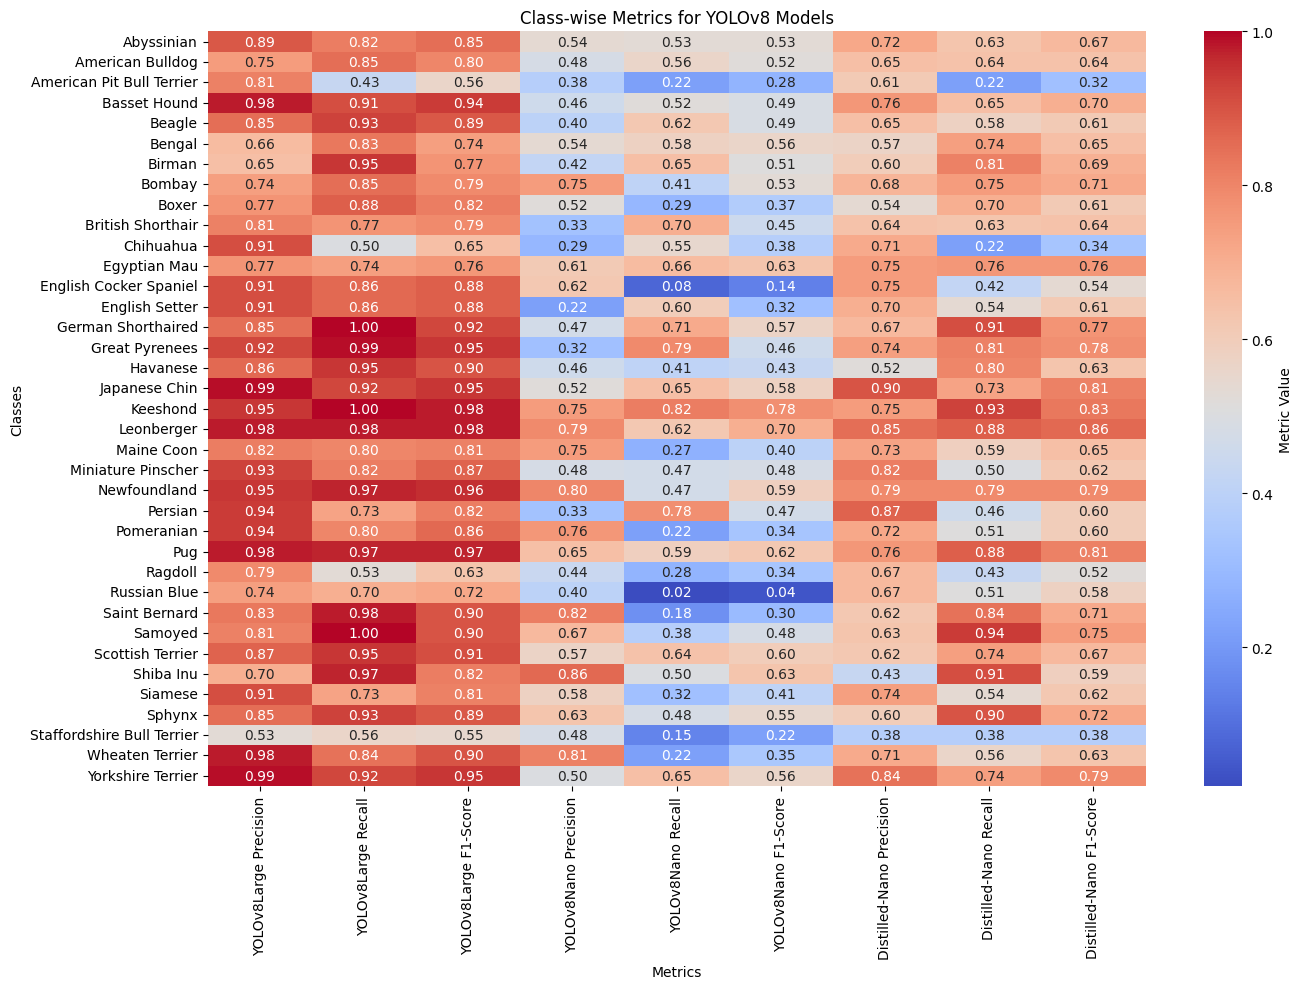

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data for each model
classes = [
    "Abyssinian", "American Bulldog", "American Pit Bull Terrier", "Basset Hound", "Beagle", "Bengal", "Birman", 
    "Bombay", "Boxer", "British Shorthair", "Chihuahua", "Egyptian Mau", "English Cocker Spaniel", "English Setter", 
    "German Shorthaired", "Great Pyrenees", "Havanese", "Japanese Chin", "Keeshond", "Leonberger", "Maine Coon", 
    "Miniature Pinscher", "Newfoundland", "Persian", "Pomeranian", "Pug", "Ragdoll", "Russian Blue", "Saint Bernard", 
    "Samoyed", "Scottish Terrier", "Shiba Inu", "Siamese", "Sphynx", "Staffordshire Bull Terrier", "Wheaten Terrier", 
    "Yorkshire Terrier"
]

# Precision, Recall, F1-score for each model
precision_large = [0.89, 0.75, 0.81, 0.98, 0.85, 0.66, 0.65, 0.74, 0.77, 0.81, 0.91, 0.77, 0.91, 0.91, 0.85, 0.92, 0.86, 0.99, 0.95, 0.98, 0.82, 0.93, 0.95, 0.94, 0.94, 0.98, 0.79, 0.74, 0.83, 0.81, 0.87, 0.70, 0.91, 0.85, 0.53, 0.98, 0.99]
recall_large = [0.82, 0.85, 0.43, 0.91, 0.93, 0.83, 0.95, 0.85, 0.88, 0.77, 0.50, 0.74, 0.86, 0.86, 1.00, 0.99, 0.95, 0.92, 1.00, 0.98, 0.80, 0.82, 0.97, 0.73, 0.80, 0.97, 0.53, 0.70, 0.98, 1.00, 0.95, 0.97, 0.73, 0.93, 0.56, 0.84, 0.92]
f1_large = [0.85, 0.80, 0.56, 0.94, 0.89, 0.74, 0.77, 0.79, 0.82, 0.79, 0.65, 0.76, 0.88, 0.88, 0.92, 0.95, 0.90, 0.95, 0.98, 0.98, 0.81, 0.87, 0.96, 0.82, 0.86, 0.97, 0.63, 0.72, 0.90, 0.90, 0.91, 0.82, 0.81, 0.89, 0.55, 0.90, 0.95]

precision_nano = [0.54, 0.48, 0.38, 0.46, 0.40, 0.54, 0.42, 0.75, 0.52, 0.33, 0.29, 0.61, 0.62, 0.22, 0.47, 0.32, 0.46, 0.52, 0.75, 0.79, 0.75, 0.48, 0.80, 0.33, 0.76, 0.65, 0.44, 0.40, 0.82, 0.67, 0.57, 0.86, 0.58, 0.63, 0.48, 0.81, 0.50]
recall_nano = [0.53, 0.56, 0.22, 0.52, 0.62, 0.58, 0.65, 0.41, 0.29, 0.70, 0.55, 0.66, 0.08, 0.60, 0.71, 0.79, 0.41, 0.65, 0.82, 0.62, 0.27, 0.47, 0.47, 0.78, 0.22, 0.59, 0.28, 0.02, 0.18, 0.38, 0.64, 0.50, 0.32, 0.48, 0.15, 0.22, 0.65]
f1_nano = [0.53, 0.52, 0.28, 0.49, 0.49, 0.56, 0.51, 0.53, 0.37, 0.45, 0.38, 0.63, 0.14, 0.32, 0.57, 0.46, 0.43, 0.58, 0.78, 0.70, 0.40, 0.48, 0.59, 0.47, 0.34, 0.62, 0.34, 0.04, 0.30, 0.48, 0.60, 0.63, 0.41, 0.55, 0.22, 0.35, 0.56]

precision_distilled = [0.72, 0.65, 0.61, 0.76, 0.65, 0.57, 0.60, 0.68, 0.54, 0.64, 0.71, 0.75, 0.75, 0.70, 0.67, 0.74, 0.52, 0.90, 0.75, 0.85, 0.73, 0.82, 0.79, 0.87, 0.72, 0.76, 0.67, 0.67, 0.62, 0.63, 0.62, 0.43, 0.74, 0.60, 0.38, 0.71, 0.84]
recall_distilled = [0.63, 0.64, 0.22, 0.65, 0.58, 0.74, 0.81, 0.75, 0.70, 0.63, 0.22, 0.76, 0.42, 0.54, 0.91, 0.81, 0.80, 0.73, 0.93, 0.88, 0.59, 0.50, 0.79, 0.46, 0.51, 0.88, 0.43, 0.51, 0.84, 0.94, 0.74, 0.91, 0.54, 0.90, 0.38, 0.56, 0.74]
f1_distilled = [0.67, 0.64, 0.32, 0.70, 0.61, 0.65, 0.69, 0.71, 0.61, 0.64, 0.34, 0.76, 0.54, 0.61, 0.77, 0.78, 0.63, 0.81, 0.83, 0.86, 0.65, 0.62, 0.79, 0.60, 0.60, 0.81, 0.52, 0.58, 0.71, 0.75, 0.67, 0.59, 0.62, 0.72, 0.38, 0.63, 0.79]

# Create a dataframe for heatmap
metrics_df = pd.DataFrame({
    "Class": classes,
    "YOLOv8Large Precision": precision_large,
    "YOLOv8Large Recall": recall_large,
    "YOLOv8Large F1-Score": f1_large,
    "YOLOv8Nano Precision": precision_nano,
    "YOLOv8Nano Recall": recall_nano,
    "YOLOv8Nano F1-Score": f1_nano,
    "Distilled-Nano Precision": precision_distilled,
    "Distilled-Nano Recall": recall_distilled,
    "Distilled-Nano F1-Score": f1_distilled,
}).set_index("Class")

# Generate heatmap for metrics
plt.figure(figsize=(14, 10))
sns.heatmap(metrics_df, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={"label": "Metric Value"})
plt.title("Class-wise Metrics for YOLOv8 Models")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.tight_layout()
plt.savefig("classwise_metrics_heatmap.png")
plt.show()
